In [1]:
import pandas as pd
# from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
# Read the CSV file
df = pd.read_csv('temperature_log_1.csv')

# Rename the temperature column to something simpler
df = df.rename(columns={'Temperature Sensor 1._temperature._tcp.local.': 'temperature'})

# Convert timestamp string to datetime
df['timestamp'] = pd.to_datetime(df['Timestamp'])

# Drop the original Timestamp column since we have the parsed version
df = df.drop('Timestamp', axis=1)

# Display the first few rows to verify the data
print("First few rows of the parsed data:")
print(df.head())

First few rows of the parsed data:
   temperature           timestamp
0        20.69 2025-01-30 22:43:18
1        20.69 2025-01-30 22:43:24
2        20.69 2025-01-30 22:43:32
3        20.69 2025-01-30 22:43:37
4        20.69 2025-01-30 22:43:43


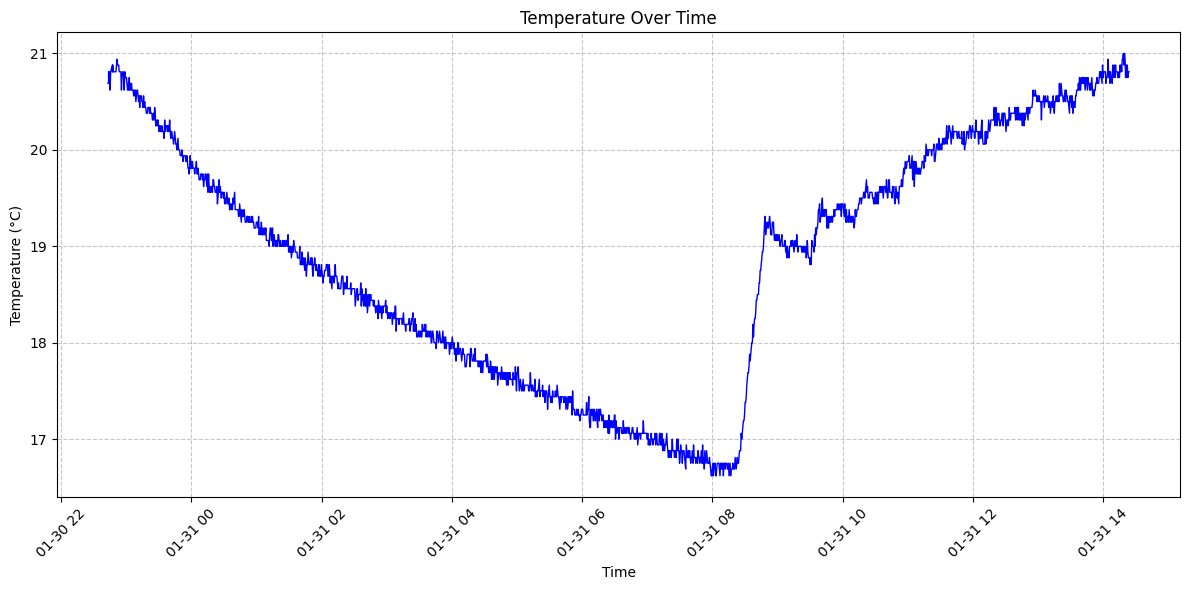

In [3]:
# Create the figure and axis with a larger size
plt.figure(figsize=(12, 6))

# Plot temperature vs time
plt.plot(df['timestamp'], df['temperature'], '-b', linewidth=1)

# Customize the plot
plt.title('Temperature Over Time')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.grid(True, linestyle='--', alpha=0.7)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Display the plot
plt.show()

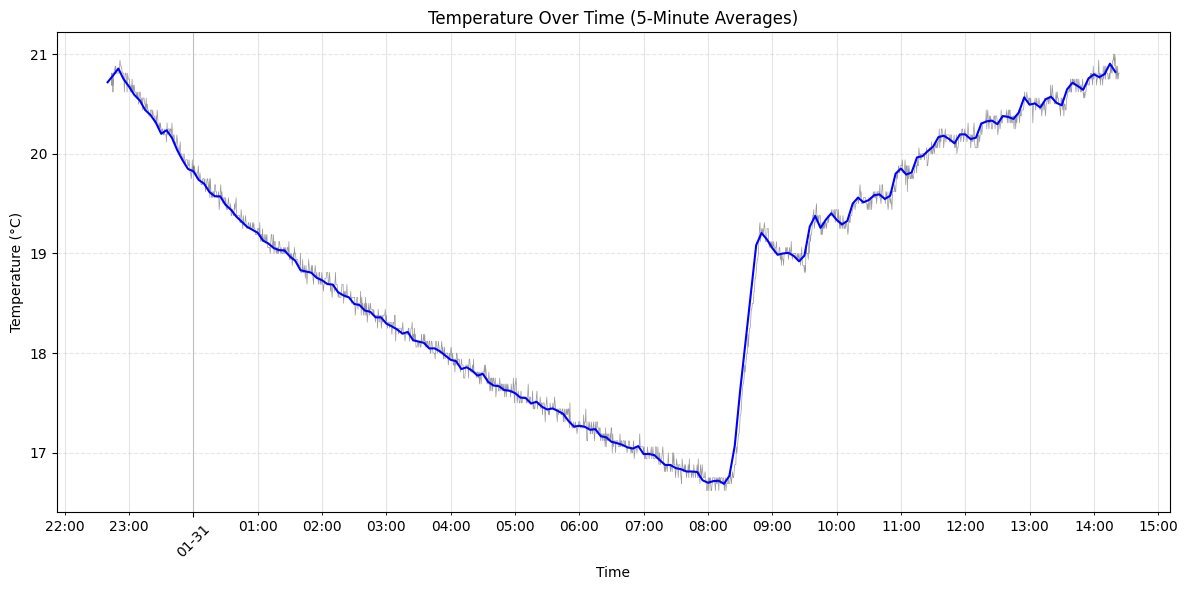

In [4]:
# Number of minutes to resample
resample_minutes = 5

# Resample data into 2-minute bins and calculate mean temperature
df_resampled = df.set_index('timestamp').resample(f'{resample_minutes}min')['temperature'].mean()

# Create the figure and axis with a larger size
plt.figure(figsize=(12, 6))

# Get the axis object
ax = plt.gca()

# Original data
plt.plot(df['timestamp'], df['temperature'], '-k', linewidth=0.5, alpha=0.4)

# Plot averaged temperature vs time
plt.plot(df_resampled.index, df_resampled.values, '-b', linewidth=1.5)

# Customize the plot
plt.title(f'Temperature Over Time ({resample_minutes}-Minute Averages)')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')

# Set up grid with different styles for major (daily) and minor (hourly) lines
ax.grid(True, which='major', axis='x', linestyle='-', color='gray', alpha=0.5)  # Darker daily lines
ax.grid(True, which='minor', axis='x', linestyle='-', color='gray', alpha=0.2)  # Lighter hourly lines
ax.grid(True, axis='y', linestyle='--', alpha=0.3)  # Regular horizontal grid

# Format x-axis to show date once per day and hours throughout
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%H:%M'))
ax.xaxis.set_minor_locator(mdates.HourLocator())

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Display the plot
plt.show()